# Partie I : Modèle Logit binaire

Le partie I du projet consiste à réaliser un modèle de régression logistique à partir d'une table de données.
La table de données contient des informations de sinistre  concernant des individus.
Ici, le projet consiste à réaliser un modèle de régression logistique censé déterminer la survenue d'un sinistre  ou non sur une police d'assurance (ici la variable Expdays sur la durée d'exposition de contrat)

Notre Table de données contient 100022 individus et 20 variables :
- PolNum     :     Numéro de la police est une variable numerique 
- CalYear    :     Année calendaire de souscription est une variable numerique constante
- Gender     :     Genre du conducteur (Homme/Femme) est une variable qualitative
- Type       :     Type de Vehicule une variable qualitative
- Category   :     Categorie du vehiculeune variable qualitative
- Occupation :     Profession une variable qualitative
- Age        :     Age du conducteur est une variable quantitative
- Group1     :     Groupe du vehicule est une variable quantitative
- Bonus      :     Bonus-Malus est une variable quantitative
- Poldur     :     Ancienneté du contrat est une variable quantitative
- Value      :     Valeur du vehicule est une variable quantitative
- Adind      :     Indicateur d'une garantie dommages est une variable categorielle binaire
- Subgroup2  :     Sous-region d'habitation est une variable qualitative
- Group2     :     Region d'habitation est une variable qualitative
- Density    :     Densité de la population est une variable quantitative
- Expdays    :     Exposition en jours est une variable quantitative
- Nb1        :     Nombre de sinistres RC Materiels est une variable de comptage
- Nb2        :     Nombre de sinistre RC corporels  est une variable de comptage
- Surv1      :     Survenance de sinistres RC Materiels est une variable binaire
- Surv2      :     Survenance de sinistres RC Corporels est une variable binaire

    

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sm
import scipy.stats as sc
import statsmodels.api as st
from statsmodels.formula.api import ols

In [6]:
Sinistre = pd.read_excel('base.xlsx') # On essaye d'importer le dataset

In [8]:

#On supprime les variables categorielles 
Sinistre_Quant = Sinistre.drop(['Adind','Id','PolNum','CalYear','Gender','Type','Category','Occupation','SubGroup2','Group2','Nb1','Nb2','Surv1','Surv2','Exppdays'],axis=1)

In [9]:
Sinistre_Quant

,Age,Group1,Bonus,Poldur,Value,Density
0,25,18,90,3,15080,72.012883
1,20,11,30,2,22370,39.550411
2,42,11,150,0,39650,169.529148
3,21,5,0,0,12600,58.894688
4,33,12,30,10,9065,109.631885
5,26,13,40,7,27335,47.982698
6,20,7,80,13,7710,77.737385
7,29,3,-20,12,8965,272.966995
8,31,3,-40,10,21030,251.432848
9,35,7,120,1,19995,144.998902


## Analyse exploratoire Quantitative

In [112]:
Sinistre_Quant.describe() # On effectue le tableau descriptif des variables quantitatives

,Age,Group1,Bonus,Poldur,Value,Density
count,100021.000000,100021.000000,100021.000000,100021.000000,100021.000000,100021.000000
mean,41.122514,10.692625,-6.921646,5.470781,16454.675268,117.159270
std,14.299349,4.687286,48.633165,4.591194,10506.742732,79.500907
min,18.000000,1.000000,-50.000000,0.000000,1000.000000,14.377142
25%,30.000000,7.000000,-40.000000,1.000000,8380.000000,50.625783
50%,40.000000,11.000000,-30.000000,4.000000,14610.000000,94.364623
75%,51.000000,14.000000,10.000000,9.000000,22575.000000,174.644525
max,75.000000,20.000000,150.000000,15.000000,49995.000000,297.385170


D'après les resultats de cet tableau on peut en tirer :\\
- L'age des clients varie entre 18 et 75 ans .L'age moyen vaut 41,12 ans et au moins 50\% ont un age inferieur à 40 ans .\\
-La durée moyenne du contrat est de 5 ans .La plus grande ancienneté du contrat vaut 15 ans . 

### La boite à Moustache des variables quantitatives

(array([1, 2, 3, 4, 5]), <a list of 5 Text xticklabel objects>)

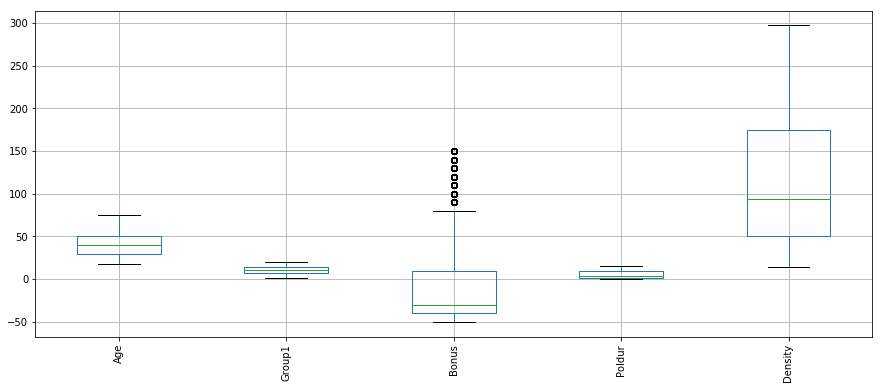

In [109]:

plt.subplots(figsize=(15,6))
Sinistre_Quant.boxplot(column =['Age','Group1','Bonus','Poldur','Density'])
plt.xticks(rotation=90)

### Recodage des variables

On a décider de recoder les variables qualitatives et de définir des catégories de référence

-La variable Gender a eté codé en binaire et les femmes sont mis dans la categorie des reference.

-La variable Occupation prend 1 si l'individu est employé et 0 sinon

- La  variable Category prend 1 si la catégorie de voiture est Large

-La variable Type prend 1 si la voiture est de type A et 0 sinon

-La variable Exppdays  est considérée comme la variable offset pour la suite de la modélisation .

###  La Matrice de correlation des variables quantitatives

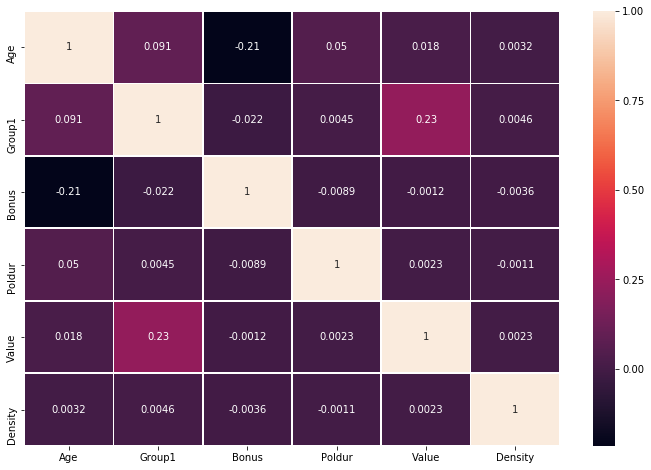

In [113]:
plt.subplots(figsize =(12,8))
sm.heatmap(Sinistre_Quant.corr(),linewidth=0.75, annot=True)

Les coefficients de corrélations sont inférieurs à 0.25,ce qui montre que les variables ne sont pas corrélées entre elles .

Il n'y aura donc pas un problème de colinéarité dans la partie de la modélisation 

### Test d'Anova à plusieurs facteurs

In [8]:
Sinistre_Quant_lm = ols('Surv1 ~ Age+Group1+Bonus+Poldur+Value+Density+Exppdays',
                 data=Sinistre).fit()

In [9]:
resultat = st.stats.anova_lm(Sinistre_Quant_lm, type = 1)
resultat

,df,sum_sq,mean_sq,F,PR(>F)
Age,1.0,278.370588,278.370588,2848.129737,0.000000e+00
Group1,1.0,107.297495,107.297495,1097.807027,1.980280e-239
Bonus,1.0,409.083797,409.083797,4185.513050,0.000000e+00
Poldur,1.0,10.909319,10.909319,111.617956,4.471884e-26
Value,1.0,0.081053,0.081053,0.829284,3.624819e-01
Density,1.0,129.847005,129.847005,1328.520798,5.720155e-289
Exppdays,1.0,59.406378,59.406378,607.812320,8.420350e-134
Residual,100013.0,9775.073530,0.097738,NaN,NaN


## Analyse Exploratoire Qualitative

In [10]:
Sinistre_Quali = Sinistre.drop(Sinistre_Quant,axis =1)
Sinistre_Qualitative =Sinistre_Quali.drop(['Id','PolNum','CalYear','Adind','SubGroup2','Group2','Nb1','Nb2','Surv1','Surv2'],axis=1)
Sinistre_Qualitative

,Gender,Type,Category,Occupation
0,Male,C,Large,Employed
1,Male,E,Large,Employed
2,Female,E,Large,Unemployed
3,Female,C,Medium,Housewife
4,Female,D,Large,Employed
5,Female,D,Small,Employed
6,Female,C,Small,Unemployed
7,Female,B,Medium,Employed
8,Male,E,Medium,Unemployed
9,Male,D,Medium,Employed


### Test Chi2 et tableau de contingence

In [11]:
from scipy.stats import chi2_contingency
a = pd.crosstab(Sinistre_Quali['Nb2'],Sinistre_Quali['Surv2'])

chi2_contingency(a)



(100020.99999999999, 0.0, 3, array([[9.12119977e+04, 4.30300227e+03],
        [4.14257076e+03, 1.95429240e+02],
        [1.54701813e+02, 7.29818738e+00],
        [5.72969676e+00, 2.70303236e-01]]))

## Recodage des variables

In [12]:
TrancheAge = pd.cut(Sinistre['Age'], 6)
Sinistre['TrancheAge'] = TrancheAge
#Sinistre[['TrancheAge','Surv1']].groupby(['TrancheAge'], as_index=False).sum().sort_values(by='TrancheAge', ascending=True)
Sinistre

,Id,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,...,Adind,SubGroup2,Group2,Density,Exppdays,Nb1,Nb2,Surv1,Surv2,TrancheAge
0,1,200114978,2009,Male,C,Large,Employed,25,18,90,...,0,L46,L,72.012883,365,1,0,1,0,"(17.943, 27.5]"
1,2,200114994,2009,Male,E,Large,Employed,20,11,30,...,1,O38,O,39.550411,365,1,0,1,0,"(17.943, 27.5]"
2,3,200115001,2009,Female,E,Large,Unemployed,42,11,150,...,0,Q28,Q,169.529148,365,2,0,1,0,"(37.0, 46.5]"
3,4,200115011,2009,Female,C,Medium,Housewife,21,5,0,...,1,L6,L,58.894688,365,1,0,1,0,"(17.943, 27.5]"
4,5,200115015,2009,Female,D,Large,Employed,33,12,30,...,0,N4,N,109.631885,365,2,0,1,0,"(27.5, 37.0]"
5,6,200115016,2009,Female,D,Small,Employed,26,13,40,...,1,N16,N,47.982698,365,1,0,1,0,"(17.943, 27.5]"
6,7,200115023,2009,Female,C,Small,Unemployed,20,7,80,...,0,Q65,Q,77.737385,365,1,0,1,0,"(17.943, 27.5]"
7,8,200115043,2009,Female,B,Medium,Employed,29,3,-20,...,0,R19,R,272.966995,365,1,0,1,0,"(27.5, 37.0]"
8,9,200115048,2009,Male,E,Medium,Unemployed,31,3,-40,...,1,R9,R,251.432848,355,1,0,1,0,"(27.5, 37.0]"
9,10,200115063,2009,Male,D,Medium,Employed,35,7,120,...,1,Q22,Q,144.998902,365,1,0,1,0,"(27.5, 37.0]"


### Encodage Variable Gender

In [13]:
# integer encode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Sinistre['Gender'])
print(integer_encoded)

[1 1 0 ... 1 0 0]


In [14]:
Sinistre['Gender'] =integer_encoded
Sinistre['Gender'] 



0         1
1         1
2         0
3         0
4         0
5         0
6         0
7         0
8         1
9         1
10        1
11        0
12        0
13        1
14        1
15        0
16        1
17        0
18        1
19        1
20        1
21        1
22        0
23        0
24        0
25        1
26        1
27        0
28        0
29        1
         ..
99991     0
99992     0
99993     1
99994     1
99995     0
99996     0
99997     1
99998     0
99999     0
100000    1
100001    1
100002    1
100003    0
100004    0
100005    1
100006    1
100007    1
100008    1
100009    0
100010    0
100011    1
100012    0
100013    0
100014    0
100015    1
100016    1
100017    1
100018    1
100019    0
100020    0
Name: Gender, Length: 100021, dtype: int32

### Encodage Variable Occupation

In [15]:
# integer encode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
b = label_encoder.fit_transform(Sinistre['Occupation'])
print(integer_encoded)
Sinistre['Occupation'] = b
Sinistre['Occupation']

[1 1 0 ... 1 0 0]


0         0
1         0
2         4
3         1
4         0
5         0
6         4
7         0
8         4
9         0
10        0
11        1
12        4
13        4
14        0
15        0
16        4
17        4
18        3
19        0
20        0
21        3
22        4
23        1
24        0
25        1
26        0
27        1
28        1
29        3
         ..
99991     2
99992     3
99993     0
99994     1
99995     0
99996     0
99997     0
99998     4
99999     4
100000    2
100001    0
100002    0
100003    1
100004    3
100005    1
100006    3
100007    0
100008    3
100009    2
100010    4
100011    3
100012    1
100013    3
100014    1
100015    2
100016    1
100017    2
100018    0
100019    2
100020    2
Name: Occupation, Length: 100021, dtype: int32

In [16]:
Sinistre['Occupation'] = Sinistre['Occupation'].apply(lambda x: 1 if x == 0 else 0)
Sinistre['Occupation']
Sinistre
#Sinistre.drop(['Profession','Occupation','TrancheAge','Group1','SubGroup2','Group2','Nb1','Nb2','Surv2','Type',''],axis=1)

,Id,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,...,Adind,SubGroup2,Group2,Density,Exppdays,Nb1,Nb2,Surv1,Surv2,TrancheAge
0,1,200114978,2009,1,C,Large,1,25,18,90,...,0,L46,L,72.012883,365,1,0,1,0,"(17.943, 27.5]"
1,2,200114994,2009,1,E,Large,1,20,11,30,...,1,O38,O,39.550411,365,1,0,1,0,"(17.943, 27.5]"
2,3,200115001,2009,0,E,Large,0,42,11,150,...,0,Q28,Q,169.529148,365,2,0,1,0,"(37.0, 46.5]"
3,4,200115011,2009,0,C,Medium,0,21,5,0,...,1,L6,L,58.894688,365,1,0,1,0,"(17.943, 27.5]"
4,5,200115015,2009,0,D,Large,1,33,12,30,...,0,N4,N,109.631885,365,2,0,1,0,"(27.5, 37.0]"
5,6,200115016,2009,0,D,Small,1,26,13,40,...,1,N16,N,47.982698,365,1,0,1,0,"(17.943, 27.5]"
6,7,200115023,2009,0,C,Small,0,20,7,80,...,0,Q65,Q,77.737385,365,1,0,1,0,"(17.943, 27.5]"
7,8,200115043,2009,0,B,Medium,1,29,3,-20,...,0,R19,R,272.966995,365,1,0,1,0,"(27.5, 37.0]"
8,9,200115048,2009,1,E,Medium,0,31,3,-40,...,1,R9,R,251.432848,355,1,0,1,0,"(27.5, 37.0]"
9,10,200115063,2009,1,D,Medium,1,35,7,120,...,1,Q22,Q,144.998902,365,1,0,1,0,"(27.5, 37.0]"


### Encodage Variable Category

In [17]:
# integer encode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
b = label_encoder.fit_transform(Sinistre['Category'])
print(integer_encoded)
Sinistre['Category'] = b
Sinistre['Category']

[1 1 0 ... 1 0 0]


0         0
1         0
2         0
3         1
4         0
5         2
6         2
7         1
8         1
9         1
10        2
11        0
12        1
13        2
14        2
15        2
16        2
17        0
18        2
19        0
20        2
21        1
22        0
23        1
24        2
25        1
26        0
27        1
28        1
29        2
         ..
99991     0
99992     0
99993     0
99994     2
99995     2
99996     1
99997     0
99998     0
99999     1
100000    1
100001    0
100002    1
100003    0
100004    0
100005    1
100006    1
100007    2
100008    2
100009    0
100010    1
100011    0
100012    1
100013    1
100014    1
100015    0
100016    1
100017    0
100018    2
100019    0
100020    0
Name: Category, Length: 100021, dtype: int32

In [18]:


Sinistre['Category'] = Sinistre['Category'].apply(lambda x: 1 if x == 0 else 0)
Sinistre['Category']
Sinistre


,Id,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,...,Adind,SubGroup2,Group2,Density,Exppdays,Nb1,Nb2,Surv1,Surv2,TrancheAge
0,1,200114978,2009,1,C,1,1,25,18,90,...,0,L46,L,72.012883,365,1,0,1,0,"(17.943, 27.5]"
1,2,200114994,2009,1,E,1,1,20,11,30,...,1,O38,O,39.550411,365,1,0,1,0,"(17.943, 27.5]"
2,3,200115001,2009,0,E,1,0,42,11,150,...,0,Q28,Q,169.529148,365,2,0,1,0,"(37.0, 46.5]"
3,4,200115011,2009,0,C,0,0,21,5,0,...,1,L6,L,58.894688,365,1,0,1,0,"(17.943, 27.5]"
4,5,200115015,2009,0,D,1,1,33,12,30,...,0,N4,N,109.631885,365,2,0,1,0,"(27.5, 37.0]"
5,6,200115016,2009,0,D,0,1,26,13,40,...,1,N16,N,47.982698,365,1,0,1,0,"(17.943, 27.5]"
6,7,200115023,2009,0,C,0,0,20,7,80,...,0,Q65,Q,77.737385,365,1,0,1,0,"(17.943, 27.5]"
7,8,200115043,2009,0,B,0,1,29,3,-20,...,0,R19,R,272.966995,365,1,0,1,0,"(27.5, 37.0]"
8,9,200115048,2009,1,E,0,0,31,3,-40,...,1,R9,R,251.432848,355,1,0,1,0,"(27.5, 37.0]"
9,10,200115063,2009,1,D,0,1,35,7,120,...,1,Q22,Q,144.998902,365,1,0,1,0,"(27.5, 37.0]"


### Encodage Variable Type

In [19]:
# integer encode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
b = label_encoder.fit_transform(Sinistre['Type'])
print(integer_encoded)
Sinistre['Type'] = b
Sinistre['Type']

[1 1 0 ... 1 0 0]


0         2
1         4
2         4
3         2
4         3
5         3
6         2
7         1
8         4
9         3
10        2
11        0
12        0
13        3
14        3
15        0
16        3
17        3
18        0
19        3
20        1
21        2
22        4
23        3
24        1
25        5
26        3
27        1
28        0
29        2
         ..
99991     4
99992     1
99993     0
99994     3
99995     3
99996     3
99997     2
99998     0
99999     0
100000    2
100001    4
100002    1
100003    1
100004    3
100005    2
100006    3
100007    1
100008    5
100009    2
100010    0
100011    4
100012    1
100013    4
100014    0
100015    1
100016    5
100017    4
100018    2
100019    3
100020    2
Name: Type, Length: 100021, dtype: int32

In [20]:
Sinistre['Type'] = Sinistre['Type'].apply(lambda x: 1 if x == 0 else 0)
Sinistre['Type']
Sinistre


,Id,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,...,Adind,SubGroup2,Group2,Density,Exppdays,Nb1,Nb2,Surv1,Surv2,TrancheAge
0,1,200114978,2009,1,0,1,1,25,18,90,...,0,L46,L,72.012883,365,1,0,1,0,"(17.943, 27.5]"
1,2,200114994,2009,1,0,1,1,20,11,30,...,1,O38,O,39.550411,365,1,0,1,0,"(17.943, 27.5]"
2,3,200115001,2009,0,0,1,0,42,11,150,...,0,Q28,Q,169.529148,365,2,0,1,0,"(37.0, 46.5]"
3,4,200115011,2009,0,0,0,0,21,5,0,...,1,L6,L,58.894688,365,1,0,1,0,"(17.943, 27.5]"
4,5,200115015,2009,0,0,1,1,33,12,30,...,0,N4,N,109.631885,365,2,0,1,0,"(27.5, 37.0]"
5,6,200115016,2009,0,0,0,1,26,13,40,...,1,N16,N,47.982698,365,1,0,1,0,"(17.943, 27.5]"
6,7,200115023,2009,0,0,0,0,20,7,80,...,0,Q65,Q,77.737385,365,1,0,1,0,"(17.943, 27.5]"
7,8,200115043,2009,0,0,0,1,29,3,-20,...,0,R19,R,272.966995,365,1,0,1,0,"(27.5, 37.0]"
8,9,200115048,2009,1,0,0,0,31,3,-40,...,1,R9,R,251.432848,355,1,0,1,0,"(27.5, 37.0]"
9,10,200115063,2009,1,0,0,1,35,7,120,...,1,Q22,Q,144.998902,365,1,0,1,0,"(27.5, 37.0]"


### Encodage variable Exppdays

In [76]:
Sinistre['Exppdays'] =np.log(Sinistre['Exppdays'])
Sinistre

,Id,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,...,Adind,SubGroup2,Group2,Density,Exppdays,Nb1,Nb2,Surv1,Surv2,TrancheAge
0,1,200114978,2009,1,0,1,1,25,18,90,...,0,L46,L,72.012883,-0.000685,1,0,1,0,"(17.943, 27.5]"
1,2,200114994,2009,1,0,1,1,20,11,30,...,1,O38,O,39.550411,-0.000685,1,0,1,0,"(17.943, 27.5]"
2,3,200115001,2009,0,0,1,0,42,11,150,...,0,Q28,Q,169.529148,-0.000685,2,0,1,0,"(37.0, 46.5]"
3,4,200115011,2009,0,0,0,0,21,5,0,...,1,L6,L,58.894688,-0.000685,1,0,1,0,"(17.943, 27.5]"
4,5,200115015,2009,0,0,1,1,33,12,30,...,0,N4,N,109.631885,-0.000685,2,0,1,0,"(27.5, 37.0]"
5,6,200115016,2009,0,0,0,1,26,13,40,...,1,N16,N,47.982698,-0.000685,1,0,1,0,"(17.943, 27.5]"
6,7,200115023,2009,0,0,0,0,20,7,80,...,0,Q65,Q,77.737385,-0.000685,1,0,1,0,"(17.943, 27.5]"
7,8,200115043,2009,0,0,0,1,29,3,-20,...,0,R19,R,272.966995,-0.000685,1,0,1,0,"(27.5, 37.0]"
8,9,200115048,2009,1,0,0,0,31,3,-40,...,1,R9,R,251.432848,-0.028464,1,0,1,0,"(27.5, 37.0]"
9,10,200115063,2009,1,0,0,1,35,7,120,...,1,Q22,Q,144.998902,-0.000685,1,0,1,0,"(27.5, 37.0]"


In [22]:
Sinistre_Logit = Sinistre.drop(['Id','PolNum','CalYear','SubGroup2','Group2','Nb1','Nb2','Surv2','Gender','Value','Exppdays','Poldur','TrancheAge'],axis = 1)
Sinistre_Logit

,Type,Category,Occupation,Age,Group1,Bonus,Adind,Density,Surv1
0,0,1,1,25,18,90,0,72.012883,1
1,0,1,1,20,11,30,1,39.550411,1
2,0,1,0,42,11,150,0,169.529148,1
3,0,0,0,21,5,0,1,58.894688,1
4,0,1,1,33,12,30,0,109.631885,1
5,0,0,1,26,13,40,1,47.982698,1
6,0,0,0,20,7,80,0,77.737385,1
7,0,0,1,29,3,-20,0,272.966995,1
8,0,0,0,31,3,-40,1,251.432848,1
9,0,0,1,35,7,120,1,144.998902,1


## La Modèlisation du problème par la regression logistique

Le modèle logit ou régression logistique est un modèle de régression ou la variable dépendante est une variable binaire .Dans notre cas,notre variable  dépendante Surv1 indiquant la survenue ou  non de sinistres.



In [23]:
X = Sinistre_Logit.drop(['Surv1'],axis=1)
Y = Sinistre_Logit['Surv1']

Pour la validation de notre modèle ,on essaye de diviser notre échantillons en deux : Un ensemble d'entraînement 70\% de nos données pour évaluer notre modèle  et un ensemble de test 30\% pour la validation .

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3)

In [25]:
print(X_train.shape) # Il s'agit de l'ensemble d'entrainement contenant 70014 individus 
print(y_train.shape)
print(X_test.shape) # Il s'agit de l'ensemble  de test contenant lui 30007 individus
print(y_test.shape)

(70014, 8)
(70014,)
(30007, 8)
(30007,)


#### Quelles sont les caracteristiques des individus qui ont des sinistres  ?

In [26]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
result = clr.fit(X_train,y_train)
#y_pred = clr.predict(X_train)

coef =dict(zip(X, zip(clr.coef_[0])))
coef

D:\Candidature\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'Type': (-0.23050851962796515,),
 'Category': (0.05170973670029277,),
 'Occupation': (-0.07905923701299832,),
 'Age': (-0.038286991203468256,),
 'Group1': (0.07204924409972535,),
 'Bonus': (0.011127054028906269,),
 'Adind': (-0.13657208985905187,),
 'Density': (0.004453385757555231,)}

In [27]:
import numpy as np 
odds = [np.math.exp(x) for x in clr.coef_[0]] # La variable odds contient l'ensemble des rapports de cote de chaque variable explicative
coef = dict(zip(X, zip(clr.coef_[0], odds))) # Il s'agit d'un dictionnaire contenant les coefficients et rapoort de cote ensemble
coef
# Nous allons creer un DataFrame pour bien rentre visible
OddsRatio =pd.DataFrame.from_dict(coef, orient='index',columns=['Coefficient','Rapport de cote'])
OddsRatio

,Coefficient,Rapport de cote
Type,-0.230509,0.794130
Category,0.051710,1.053070
Occupation,-0.079059,0.923985
Age,-0.038287,0.962437
Group1,0.072049,1.074708
Bonus,0.011127,1.011189
Adind,-0.136572,0.872343
Density,0.004453,1.004463


On remarque que les coefficient des  variables Category,Bonus,Density sont positifs .
Également ,les coefficients des variables Type ,Age sont négatifs . 

-Les assurés qui ont des voitures de catégorie large ont tendance à avoir de plus de sinistres que les autres individus de catégories de voiture différentes.

-La survenance du sinistre augmente avec le coefficient du bonus-malus, ce qui est normal car
les assurés avec un bonus élevé son ceux qui ont tendance à faire plus d’accidents.

-On voit bien que la survenance de sinistre diminue avec l'âge des assurés.  
-On peut dire que plus la densité est élevée ,plus la survenance du sinistre augmente.


In [28]:
from sklearn.metrics import confusion_matrix 
conf = confusion_matrix(y_test, clr.predict(X_test))
conf


array([[26242,    97],
       [ 3533,   135]], dtype=int64)

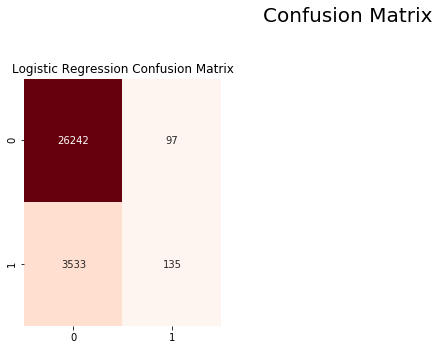

In [29]:
plt.figure(figsize=(12,10))

plt.suptitle("Confusion Matrix",fontsize=20)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sm.heatmap(conf,cbar=False,annot=True,cmap="Reds",fmt="d")

Les coefficients sur la diagonale indique les éléments bien classés ici au total notre modèle a bien classé 26377 sur 30085 individus , les coefficients en dehors de ceux que le classifieur a mis dans la mauvaise classe.

Il n'a pas parvenu à bien classer 3630 individus s'ils sont sinistrés ou non .


In [115]:
score = clr.decision_function(X_test)
sc= pd.DataFrame(data=score,columns =['SCORE']).sort_values('SCORE')
sc.head()

,SCORE
1312,-5.040603
9816,-5.039010
2219,-5.037221
22781,-4.991170
18947,-4.986989


In [116]:
proba = clr.predict_proba(X_test)
pb = pd.DataFrame(data=proba,columns =['risqué avec probabilité','Non risqué avec probabilité']).sort_values('risqué avec probabilité')
pb.head()

,risqué avec probabilité,Non risqué avec probabilité
22851,0.250643,0.749357
7782,0.256084,0.743916
6861,0.269461,0.730539
7891,0.273332,0.726668
9492,0.280133,0.719867


Par exemple,le 22051eme client présente la probabilité de sinistre  le plus faible(0.250643) c'est à dire qu'il est le moins risqué de commettre un sinistre .

In [126]:
import pandas 
Score = clr.predict_proba(X_test)[:,1]
dfsc = pandas.DataFrame(Score, columns=['Probabilité de risque']).sort_values('Probabilité de risque')
dfsc['Sinistre'] = y_test.values
dfsc

,Probabilité de risque,Sinistre
1312,0.006428,0
9816,0.006438,0
2219,0.006450,0
22781,0.006752,0
18947,0.006780,1
7634,0.006810,0
15790,0.006964,0
27278,0.007072,0
22258,0.007294,0
71,0.007312,0


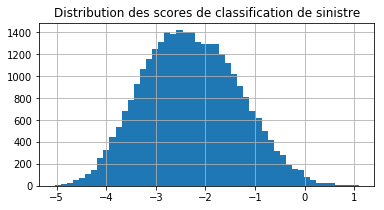

In [33]:
ax = dfsc['Score'].hist(bins=50, figsize=(6,3))
ax.set_title('Distribution des scores de classification de sinistre');

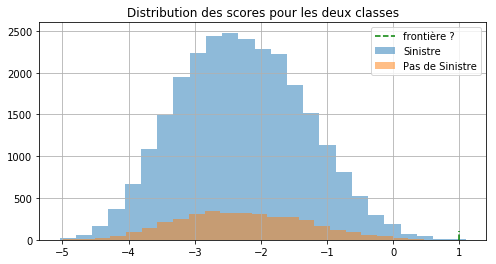

In [34]:
ax = dfsc[dfsc['Sinistre'] == 0]['Score'].hist(bins=25, figsize=(8,4), label='Sinistre', alpha=0.5)
dfsc[dfsc['Sinistre'] == 1]['Score'].hist(bins=25, ax=ax, label='Pas de Sinistre', alpha=0.5)
ax.set_title("Distribution des scores pour les deux classes")
ax.plot([1, 1], [0, 100], 'g--', label="frontière ?")
ax.legend();

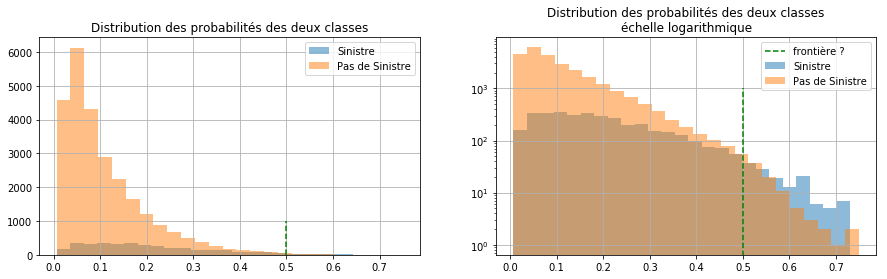

In [77]:
proba = clr.predict_proba(X_test)[:, 1]
dfpr = pandas.DataFrame(proba, columns=['proba'])
dfpr['Sinistre'] = y_test.values
dfpr['Sinistre'] 

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15,4))
dfpr[dfpr['Sinistre'] == 1]['proba'].hist(bins=25, label='Sinistre', alpha=0.5, ax=ax[0])
dfpr[dfpr['Sinistre'] == 0]['proba'].hist(bins=25, label='Pas de Sinistre', alpha=0.5, ax=ax[0])
ax[0].set_title('Distribution des probabilités des deux classes')
ax[0].legend();
dfpr[dfpr['Sinistre'] == 1]['proba'].hist(bins=25, label='Sinistre', alpha=0.5, ax=ax[1])
dfpr[dfpr['Sinistre'] == 0]['proba'].hist(bins=25, label='Pas de Sinistre', alpha=0.5, ax=ax[1])
ax[0].plot([0.5, 0.5], [0, 1000], 'g--', label="frontière ?")
ax[1].plot([0.5, 0.5], [0, 1000], 'g--', label="frontière ?")
ax[1].set_yscale('log')
ax[1].set_title('Distribution des probabilités des deux classes\néchelle logarithmique')
ax[1].legend();

L aire sous la courbe est égale à  0.7346908055993195


No handles with labels found to put in legend.


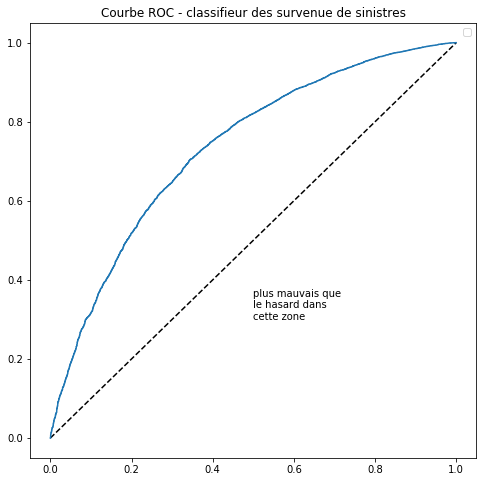

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot([0, 1], [0, 1], 'k--')
# aucf = roc_auc_score(y_test == clr.classes_[0], probas[:, 0]) # première façon
aucf = auc(fpr0, tpr0) 
print( 'L aire sous la courbe est égale à ' ,+ aucf)# seconde façon
ax.plot(fpr0, tpr0)
ax.set_title('Courbe ROC - classifieur des survenue de sinistres')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend();

La précision du modèle  qu’une observation soit mieux prédite qu’une prédiction purement aléatoire est présentée par
l’aire sous la courbe ROC.

L’aire sous la courbe pour ce modèle est égale a 0.7346 est supérieure à 0.7, cela signifie que la survenance d’un sinistre a une probabilité de 73,46\%.

## Regression de Poisson

In [81]:
Sinistre_Poisson = Sinistre.drop(['Id','PolNum','CalYear','SubGroup2','Group2','Surv1','Nb2','Surv2','TrancheAge','Gender','Value'],axis = 1)
Sinistre_Poisson

,Type,Category,Occupation,Age,Group1,Bonus,Poldur,Adind,Density,Exppdays,Nb1
0,0,1,1,25,18,90,3,0,72.012883,-0.000685,1
1,0,1,1,20,11,30,2,1,39.550411,-0.000685,1
2,0,1,0,42,11,150,0,0,169.529148,-0.000685,2
3,0,0,0,21,5,0,0,1,58.894688,-0.000685,1
4,0,1,1,33,12,30,10,0,109.631885,-0.000685,2
5,0,0,1,26,13,40,7,1,47.982698,-0.000685,1
6,0,0,0,20,7,80,13,0,77.737385,-0.000685,1
7,0,0,1,29,3,-20,12,0,272.966995,-0.000685,1
8,0,0,0,31,3,-40,10,1,251.432848,-0.028464,1
9,0,0,1,35,7,120,1,1,144.998902,-0.000685,1


In [82]:
U = Sinistre_Poisson.drop(['Nb1'],axis=1)
V = Sinistre_Poisson['Nb1']

### Les differents nombres dans la variable NB1

In [83]:
import numpy as np
np.unique(V,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([87744, 10358,  1518,   306,    62,    17,     9,     7],
       dtype=int64))

In [84]:
import statsmodels
U_Const = statsmodels.tools.add_constant(U)


In [85]:
from statsmodels.discrete.discrete_model import Poisson
mpr = Poisson(V,U_Const)
res_mpr = mpr.fit()

Optimization terminated successfully.
         Current function value: 0.384607
         Iterations 6


In [93]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

mod = GLM(V, U_Const, family=families.Poisson())
res = mod.fit()
print(res.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    Nb1   No. Observations:               100021
Model:                            GLM   Df Residuals:                   100010
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38469.
Date:                Wed, 15 Jan 2020   Deviance:                       51017.
Time:                        15:17:11   Pearson chi2:                 1.07e+05
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6128      0.038    -41.948      0.000      -1.688      -1.537
Type          -0.2019      0.019    -10.451      0.0

### La surdispersion

In [95]:
#Surdispersion 

print(res.pearson_chi2/res.df_resid) 

1.0690824717887613


#### On voit bien que le rapport de la pearson chi2_dll /residual deviance est superieur à 1 ,d'ou l'existence de la surdispersion

### Frequence de nombre de Zero dans les données 

D:\Candidature\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


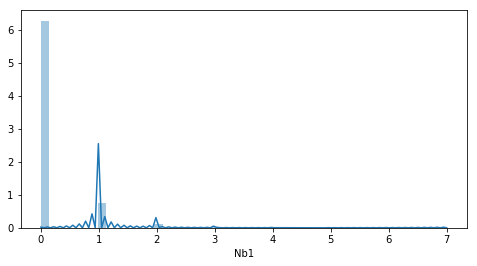

In [89]:
ax,fig = plt.subplots(1,1,figsize=(8,4))
sm.distplot(V)
plt.show()

In [ ]:
### Nombre de Zero dans le

In [106]:
for i in range(0,7) :
    zero = sum(V == i)

    print(zero)


87744
10358
1518
306
62
17
9


### Modèle Binomiale Negative

In [97]:

from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
modele_NB = GLM(V, U_Const, family=families.NegativeBinomial())
res = modele_NB.fit()
print(res.summary()) 







                 Generalized Linear Model Regression Results                  
Dep. Variable:                    Nb1   No. Observations:               100021
Model:                            GLM   Df Residuals:                   100010
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38598.
Date:                Wed, 15 Jan 2020   Deviance:                       40807.
Time:                        15:18:14   Pearson chi2:                 9.40e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6672      0.043    -38.971      0.000      -1.751      -1.583
Type          -0.2007      0.022     -9.261      0.0

In [92]:
print(res.pearson_chi2/res.df_resid)

0.9402909334093368


### Modele de poisson à Zero Inflation

In [98]:
from statsmodels.discrete.count_model import ZeroInflatedPoisson
mzip = ZeroInflatedPoisson(V,U_Const,U_Const)
res_mzip = mzip.fit(maxiter=100)


print(res_mzip.summary())

D:\Candidature\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.383716
         Iterations: 100
         Function evaluations: 117
         Gradient evaluations: 117


D:\Candidature\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                     Nb1   No. Observations:               100021
Model:             ZeroInflatedPoisson   Df Residuals:                   100010
Method:                            MLE   Df Model:                           10
Date:                 Wed, 15 Jan 2020   Pseudo R-squ.:                  0.1285
Time:                         15:18:40   Log-Likelihood:                -38380.
converged:                       False   LL-Null:                       -44039.
                                         LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
inflate_const         -0.2559      0.131     -1.954      0.051      -0.513       0.001
inflate_Type          -0.0254      0.076     -0.335      0.737      -0.174       0.123
inflate_Cate

In [108]:
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP
mzip = ZeroInflatedNegativeBinomialP(V,U_Const,U_Const)
res_mzip = mzip.fit()


print(res_mzip.summary())

D:\Candidature\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:2929: RuntimeWarning: invalid value encountered in log
  a1 * np.log(a1) + y * np.log(mu) -
D:\Candidature\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:2930: RuntimeWarning: invalid value encountered in log
  (y + a1) * np.log(a2))
D:\Candidature\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:2969: RuntimeWarning: invalid value encountered in log
  y / mu + a4 * (1 - a3 / a2 + np.log(a1 / a2)))
D:\Candidature\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:2973: RuntimeWarning: invalid value encountered in log
  1 - a3 / a2))
D:\Candidature\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:2929: RuntimeWarning: divide by zero encountered in log
  a1 * np.log(a1) + y * np.log(mu) -
D:\Candidature\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:2929: RuntimeWarning: invalid value encountered in multiply
  a1 * np.log(

         Current function value: nan
         Iterations: 16
         Function evaluations: 131
         Gradient evaluations: 131


D:\Candidature\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Candidature\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Candidature\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:2929: RuntimeWarning: invalid value encountered in log
  a1 * np.log(a1) + y * np.log(mu) -
D:\Candidature\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:2930: RuntimeWarning: invalid value encountered in log
  (y + a1) * np.log(a2))


                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                               Nb1   No. Observations:               100021
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                   100010
Method:                                      MLE   Df Model:                           10
Date:                           Wed, 15 Jan 2020   Pseudo R-squ.:                     nan
Time:                                   16:24:31   Log-Likelihood:                    nan
converged:                                 False   LL-Null:                       -43894.
                                                   LLR p-value:                       nan
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
inflate_const        -92.6897        nan        nan        nan         nan         nan
inflate_Type       

D:\Candidature\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Candidature\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Candidature\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
